# An introductional notebook to HEP analysis in C++

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)


The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<p>At first we have to include several helpers that will support our analysis:</p>

In [20]:
#include <iostream>
#include <string>
#include <stdio.h>
#include <fstream>
#include <iomanip>

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [21]:
TFile *file = TFile::Open("Tracks_Clusters.root");
//TFile *file = TFile::Open("https://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TracksClusters/Tracks_Clusters.root");

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree". We will then print the contents of the tree to find the names of the variables. 

In [22]:
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print()

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................


<p>The next step is to extract the varibles we want from the dataset. We will plot first an <b>"event"</b> variable: the number of primary vertices: 

In [23]:
UInt_t npv = -1;
tree->SetBranchAddress("NPV", &npv);

After the data is opened we create a canvas on which we can draw a histogram. If we do not have a canvas we cannot see our histogram at the end. Its name is _Canvas_ and its header is _a first way to plot a variable_. The two following arguments define the width and the height of the canvas.

In [24]:
TCanvas *canvas = new TCanvas("Canvas","a first way to plot a variable",800,600);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


Now we define a histogram that will later be placed on this canvas. Its name is NPV and the header of the histogram is Example plot: Number of primary vertices. The three following arguments indicate that this histogram contains 50 so called bins which have a range from 1 to 50.

In [25]:
TH1F *hist_npv = new TH1F("NPV","Example plot: Number of primary vertices; NPV ; Events ",50,1,50);

The following lines are a loop that goes over the data that is stored in the tree and fills the histogram that we already defined. In this first notebook we don't do any cuts to keep it simple. Accordingly the loop fills the histogram for each event stored in the tree. After the program has looped over all the data it prints the word</p>
__Done!__.

In [26]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_npv->Fill(npv);
}

std::cout << "Done!" << std::endl;

Done!


<p>After filling the histogram we want to see the results of the analysis. First we draw the histogram on the canvas and then the canvas on which the histogram lies:</p>

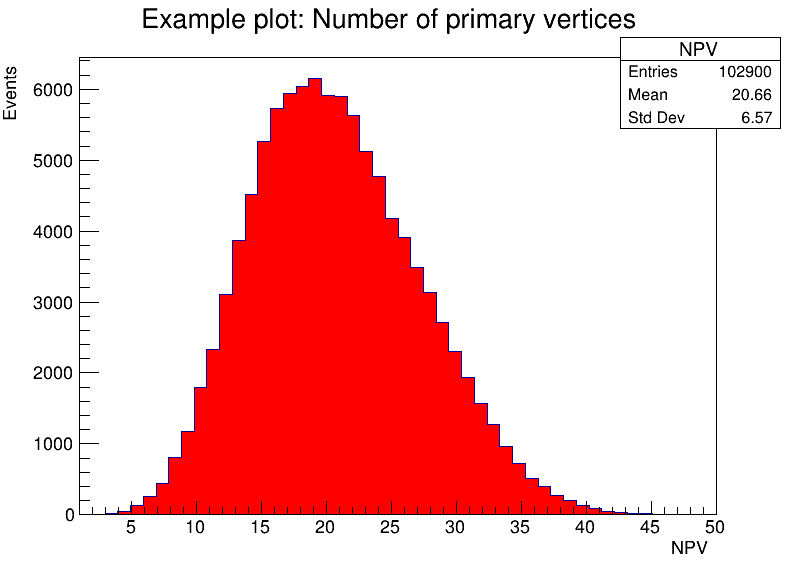

In [27]:
hist_npv->SetFillColor(kRed);
hist_npv->Draw();
canvas->Draw();

In [28]:
Float_t scale = hist_npv->Integral();
hist_npv->Scale(1/scale);
hist_npv->SetFillColor(2);

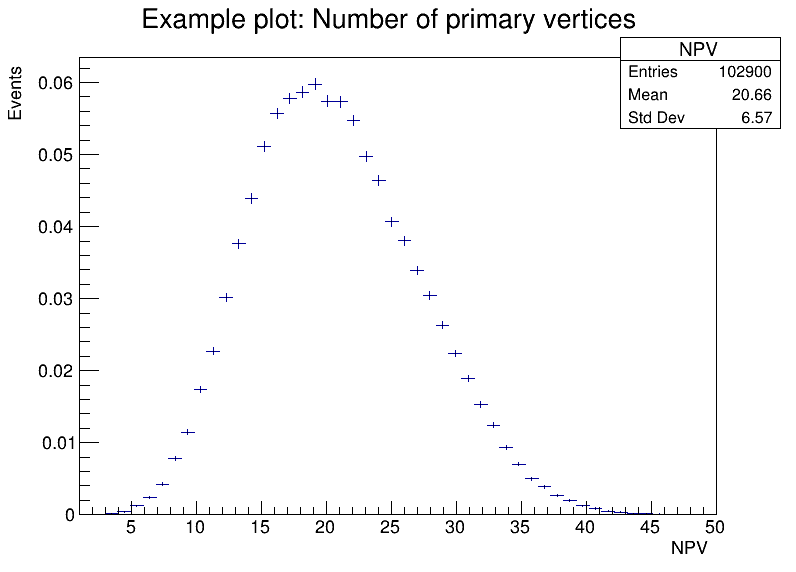

In [29]:
hist_npv->Draw();
canvas->Draw();

<b>Excercises: 
    1. Plot the number of average interactions per bunch-crossing (mu_average)
    2. Make a 2D histogram of NPV vs. mu
</b>

Exercise 1. Plot the number of average interactions per bunch-crossing.

In [30]:
Float_t mu_avg = -1;
tree->SetBranchAddress("mu_average", &mu_avg);

In [31]:
int aux=(Float_t)tree->GetEntries();
std::cout<<aux<<std::endl;

102900


In [32]:
TH1F *hist_mu_avg = new TH1F("mu_average","Exercise 1 plot: Number of average interactions per bunch-crossing; mu_average ; Events ",40,5,85);

In [33]:
int nentries, nbytes, i;
nentries = (Float_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_mu_avg->Fill(mu_avg);
}

std::cout << "Done!" << std::endl;

Done!


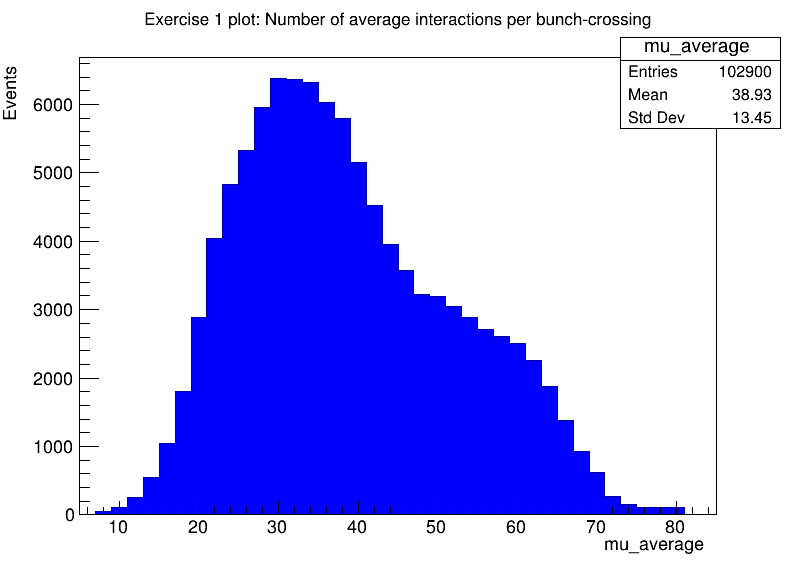

In [34]:
hist_mu_avg->SetFillColor(kBlue);
hist_mu_avg->Draw("");
canvas->Draw();

Exercise 2. Make a 2D histogram of NPV vs. mu

In [35]:
TH2F *hist_npv_vs_mu = new TH2F("NPV_Vs_Mu","Exercise 2 plot: NPV vs Average Interactions; NPV ; mu_average ",50,1,50,40,5,85);

In [36]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_npv_vs_mu->Fill(npv, mu_avg);
}

std::cout << "Done!" << std::endl;

Done!


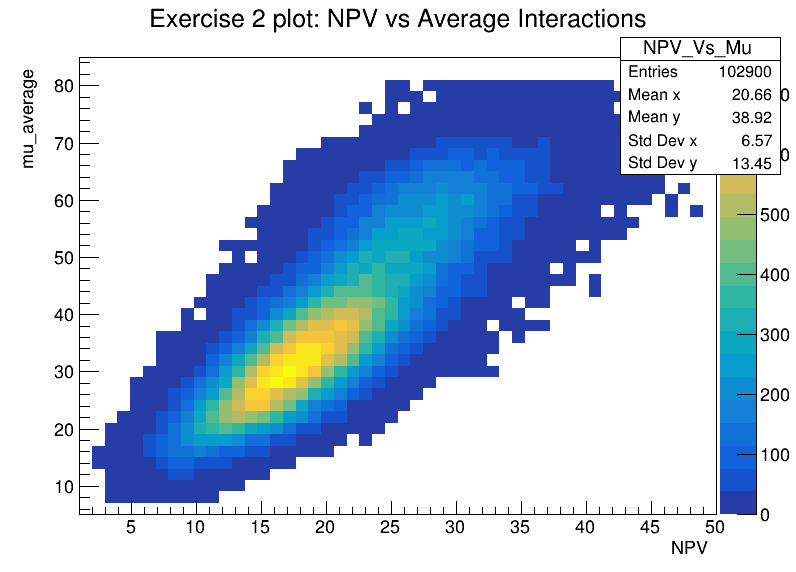

In [37]:
hist_npv_vs_mu->SetMarkerColorAlpha(9,1);
hist_npv_vs_mu->SetMarkerStyle(2);
hist_npv_vs_mu->Draw("colz");
canvas->Draw();

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Some branches are not event variables, but objects with some kinematical infomation. They are stored in vectors. For example tracks and clusters. We will create two histograms to store the number of tracks and clusters in each event. 

In [38]:
TH1F *hist_nTrks = new TH1F("NTracks","Example plot: Number of tracks; NTracks ; Events ",50,0,1000);
TH1F *hist_nCltrs = new TH1F("NClusters","Example plot: Number of clusters; NClusters ; Events ",50,0,1000);

Now we activate two branches

In [39]:
vector<float> *tracks_pt;
vector<float> *clusters_pt;

tree->SetBranchAddress("Tracks_pt", &tracks_pt);
tree->SetBranchAddress("Clusters_pt", &clusters_pt);

For each event, fill the histograms with the size of the vectors

In [40]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_nTrks->Fill(tracks_pt->size());
    hist_nCltrs->Fill(clusters_pt->size());
}
std::cout << "Done!" << std::endl;

Done!


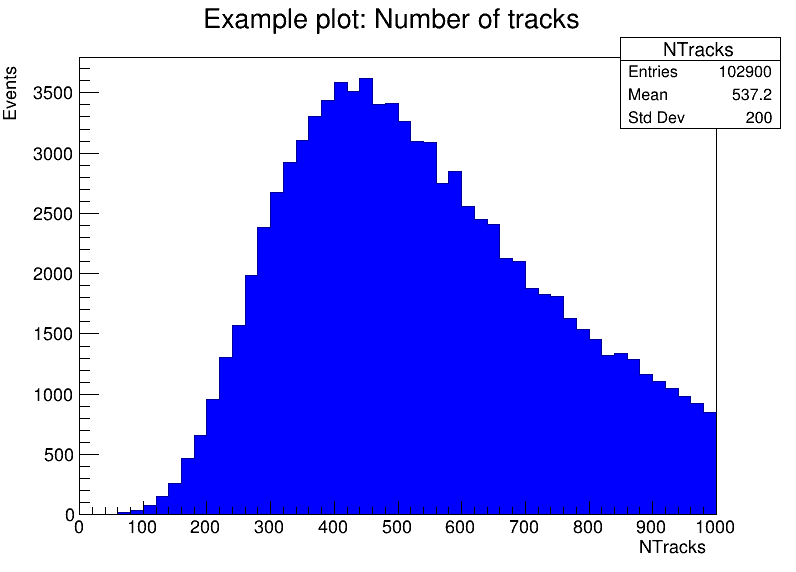

In [41]:
hist_nTrks->SetFillColor(kBlue);
hist_nTrks->Draw();
canvas->Draw();

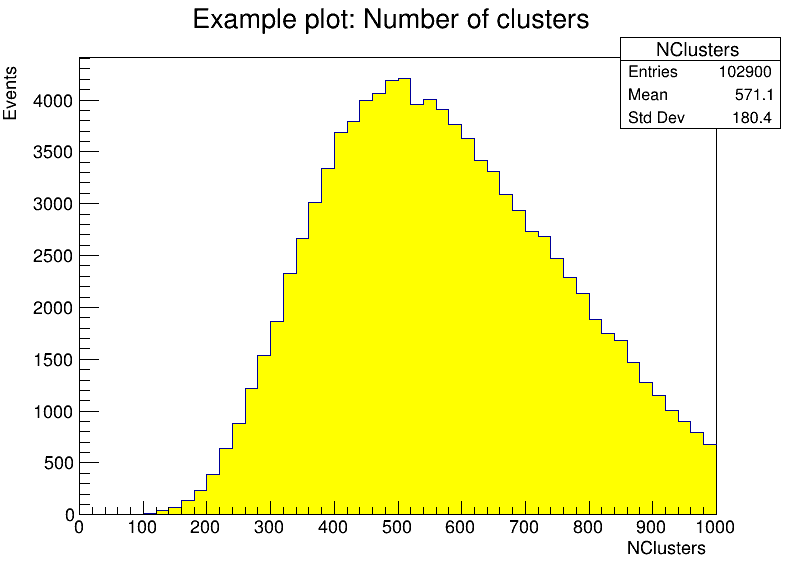

In [42]:
hist_nCltrs->SetFillColor(kYellow);
hist_nCltrs->Draw();
canvas->Draw();

<b>Excercise: 
    3. Make a 2D histogram of NPV and mu vs. nTracks and nClusters
</b>

Exercise 3: Make a 2D histogram of NPV and mu vs. nTracks and nClusters

In [43]:
TH1F *hist_npv_and_mu = new TH1F("NPV_MU","Exercise 3 aux plot: Number of average interactions per bunch-crossing + NPV; NPV and mu_average ; Results ",40,1,85);
TH1F *hist_nTrks_and_nCltrs = new TH1F("NTracks_NClusters","Exercise 3 aux plot: Number of tracks+Clusters; NTracks and NClusters; Results ",50,0,1000);


In [44]:
for (int k = 0; k<10;k++){
    std::cout<< k*200 + 50 << '\t' << tree->GetEntry(k*200 + 50) << '\t' << mu_avg << '\n';
}

50	24430	27.5
250	32886	44.49
450	24070	36.5
650	25598	29.49
850	27294	53.5
1050	39798	45.5
1250	26862	35.5
1450	25874	16.5
1650	25522	23.5
1850	24706	20.49


In [45]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_npv_and_mu->Fill(mu_avg);
    hist_npv_and_mu->Fill(npv);
    hist_nTrks_and_nCltrs->Fill(tracks_pt->size());
    hist_nTrks_and_nCltrs->Fill(clusters_pt->size());
}

std::cout << "Done!" << std::endl;

Done!


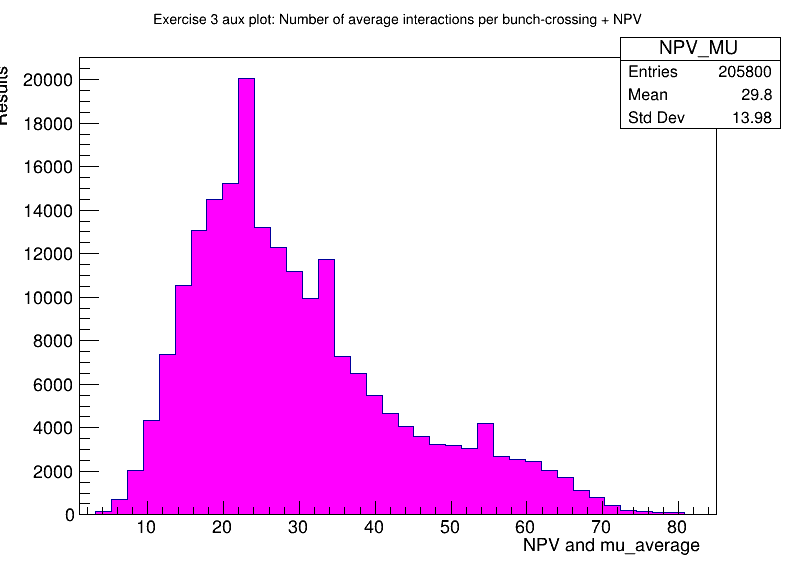

In [46]:
hist_npv_and_mu->SetFillColor(6);
hist_npv_and_mu->Draw();
canvas->Draw();

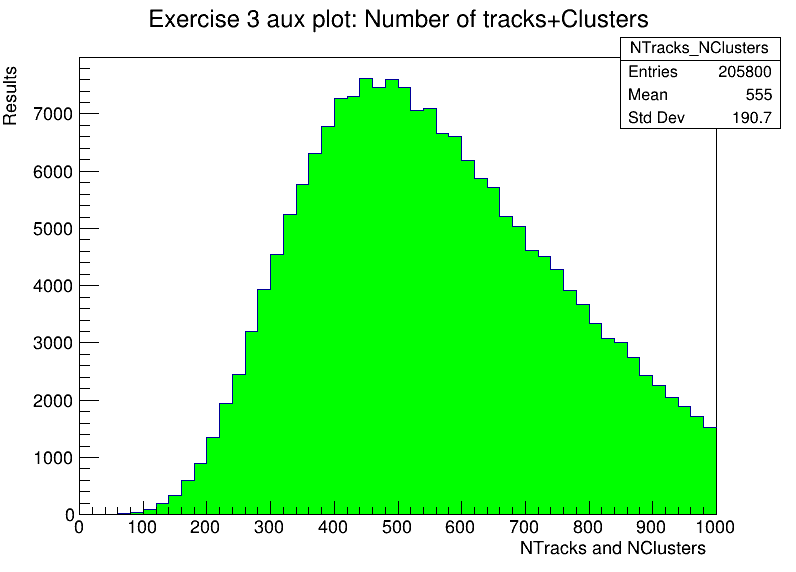

In [47]:
hist_nTrks_and_nCltrs->SetFillColor(3);
hist_nTrks_and_nCltrs->Draw();
canvas->Draw();

$$\textbf{Excercise 3}$$

In [48]:
TH2F *hist_npv_vs_trks= new TH2F("EX3a","Exercise 3 plot: NPV vs Tracks; NPV; NTracks",60,1,85,60,0,2000);
TH2F *hist_npv_vs_cltrs = new TH2F("EX3b","Exercise 3 plot: NPV  vs Clusters; NPV ; NClusters ",60,1,85,60,0,1800);
TH2F *hist_mu_vs_trks = new TH2F("EX3c","Exercise 3 plot:  mu vs Tracks;Mu ; NTracks ",60,1,100,60,0,2000);
TH2F *hist_mu_vs_cltrs = new TH2F("EX3d","Exercise 3 plot: mu vs Clusters; Mu ; NClusters ",60,1,100,60,0,1800);

In [49]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_npv_vs_trks->Fill(npv, tracks_pt->size());
    hist_npv_vs_cltrs->Fill(npv, clusters_pt->size());
    hist_mu_vs_trks->Fill(mu_avg, tracks_pt->size());
    hist_mu_vs_cltrs->Fill(mu_avg, clusters_pt->size());
}

std::cout << "Done!" << std::endl;


Done!


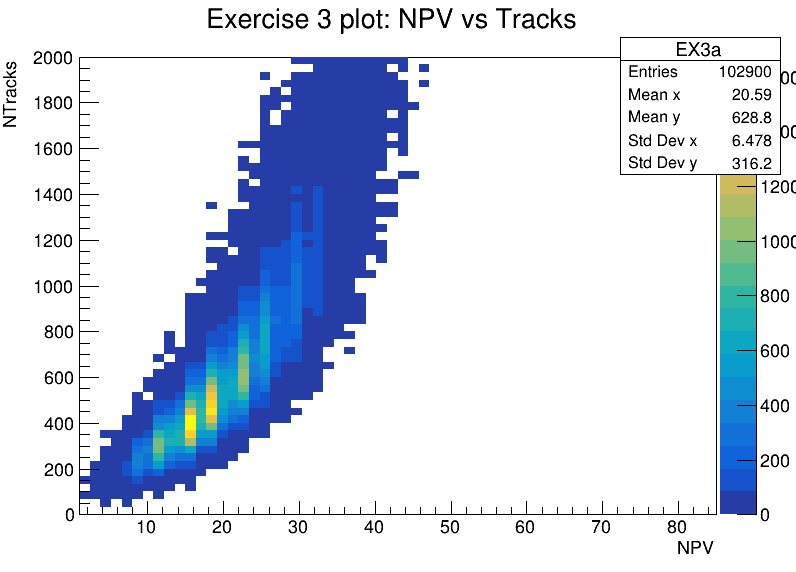

In [50]:

hist_npv_vs_trks->Draw("colz");
canvas->Draw();

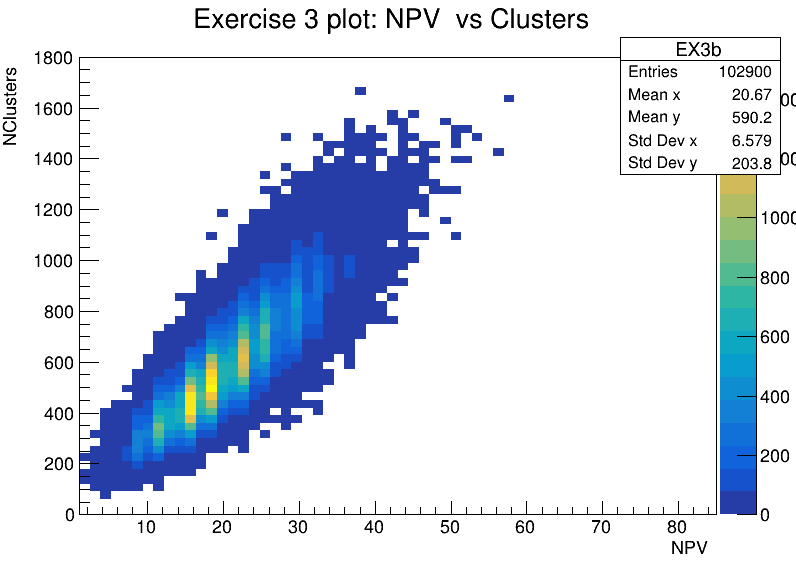

In [51]:

hist_npv_vs_cltrs->Draw("colz");
canvas->Draw();

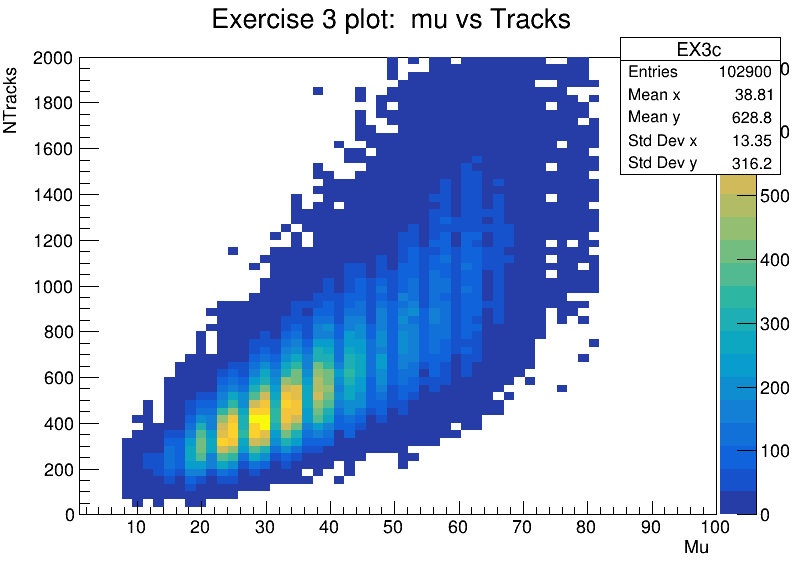

In [52]:

hist_mu_vs_trks->Draw("colz");

canvas->Draw();

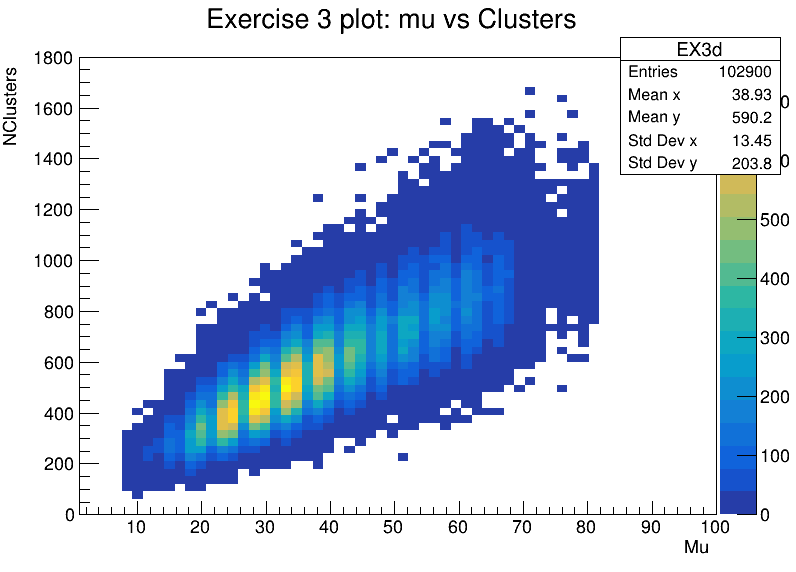

In [53]:

hist_mu_vs_cltrs->Draw("colz");
canvas->Draw();

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Now let us plot the pT of the "lead" track:

In [46]:
TH1F *hist_lead_track_pT = new TH1F("Lead_Track_pT","Example plot: Track pT; pT (MeV) ; Events ",50,400,3000);

In [47]:
std::cout<< tree->GetEntry(40) << '\t' << tracks_pt->size() << std::endl;

83014	2659


In [48]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<tracks_pt->size(); tr++)
    {
        hist_lead_track_pT->Fill(tracks_pt->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


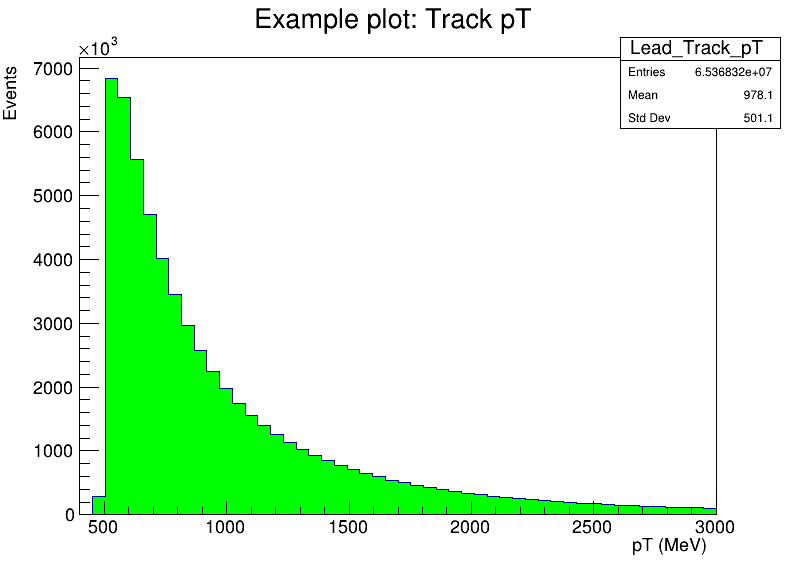

In [49]:
hist_lead_track_pT->SetFillColor(kGreen);
hist_lead_track_pT->Draw();
canvas->Draw();

<b>Excercises: 
4. Plot all track and cluster variables
5. Interpret the meaning of each variable
6. What is "Particle PDG ID"?
</b>

Exercise 4. Plot all track and cluster variables.

In [84]:
vector<float> *tracks_pt;
vector<float> *tracks_eta;
vector<float> *tracks_phi;
vector<float> *tracks_m;
vector<int> *tracks_vtx;

tree->SetBranchAddress("Tracks_pt", &tracks_pt);
tree->SetBranchAddress("Tracks_eta", &tracks_eta);
tree->SetBranchAddress("Tracks_phi", &tracks_phi);
tree->SetBranchAddress("Tracks_m", &tracks_m);
tree->SetBranchAddress("Tracks_vtx", &tracks_vtx);

TH1F *hist_Trks_pt = new TH1F("Tracks_pt","Exercise 4 plot: pT of tracks; Tracks_pt ; Events ",50,480,2000);
TH1F *hist_Trks_eta = new TH1F("Tracks_eta","Exercise 4 plot: eta of tracks; Tracks_eta ; Events ",50,-5,5);
TH1F *hist_Trks_phi = new TH1F("Tracks_phi","Exercise 4 plot: phi of tracks; Tracks_phi ; Events ",50,-5,5);
TH1F *hist_Trks_m = new TH1F("Tracks_m","Exercise 4 plot: m of tracks; Tracks_m ; Events ",10,135,145);
TH1I *hist_Trks_vtx = new TH1I("Tracks_vtx","Exercise 4 plot: vtx od tracks; Tracks_vtx ; Events ",50,-5,5);

Warning in <TFile::Append>: Replacing existing TH1: Tracks_pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Tracks_eta (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Tracks_phi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Tracks_m (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Tracks_vtx (Potential memory leak).


In [85]:
for (int l = 0; l < 10; l++){
    std::cout<< tree->GetEntry(l) << '\t' << tracks_pt->size() << '\t' << tracks_eta->size() << '\t' 
                                  << tracks_phi->size() << '\t' << tracks_m->size() << '\t' << tracks_vtx->size() << '\n';
}

34546	593	593	593	593	593
28262	371	371	371	371	371
31002	480	480	480	480	480
37070	781	781	781	781	781
18334	306	306	306	306	306
23498	293	293	293	293	293
30206	530	530	530	530	530
26962	372	372	372	372	372
47374	1041	1041	1041	1041	1041
36758	832	832	832	832	832


In [86]:
for (int l = 0; l < 10; l++){
    std::cout<< tree->GetEntry(l) << '\t' << tracks_pt->at(l) << '\t' << tracks_eta->at(l) << '\t' 
                                  << tracks_phi->at(l) << '\t' << tracks_m->at(l) << '\t' << tracks_vtx->at(l) << '\n';
}

34546	2149.85	-2.22212	2.28991	139.554	1
28262	1695.67	2.25294	-0.804451	139.55	-1
31002	642.267	-2.20091	-0.701892	139.568	7
37070	2247.7	2.34613	-2.1821	139.603	3
18334	801.525	2.28139	-2.06579	139.569	0
23498	846.275	2.17084	-2.08445	139.566	2
30206	1105.28	-2.40473	-1.40236	139.571	3
26962	1322.64	-2.37322	-1.87239	139.576	0
47374	1176.73	2.45529	0.152179	139.569	4
36758	683.917	1.86626	0.64248	139.571	6


In [87]:
TCanvas *canvasex4 = new TCanvas("Canvastracks","Ex4",600,300);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvastracks


In [88]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<tracks_pt->size(); tr++)
    {
        hist_Trks_pt->Fill(tracks_pt->at(tr));
        hist_Trks_eta->Fill(tracks_eta->at(tr));
        hist_Trks_phi->Fill(tracks_phi->at(tr));
        hist_Trks_m->Fill(tracks_m->at(tr));
        hist_Trks_vtx->Fill(tracks_vtx->at(tr));
    } 
}
std::cout << "Done!" << std::endl;


Done!


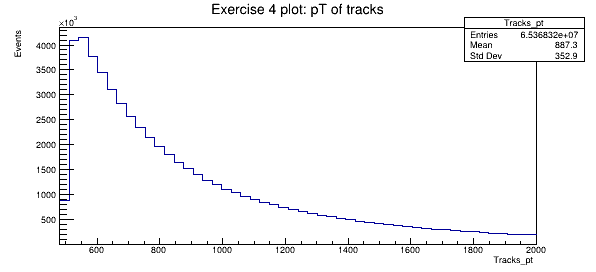

In [89]:
hist_Trks_pt->Draw();
canvasex4->Draw();

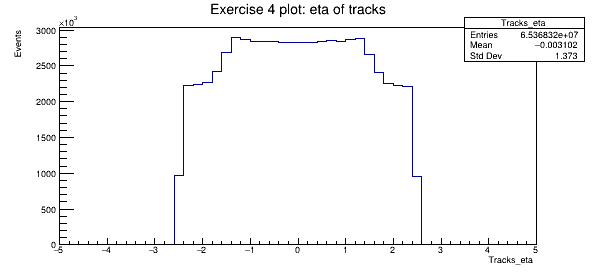

In [90]:
hist_Trks_eta->Draw();
canvasex4->Draw();

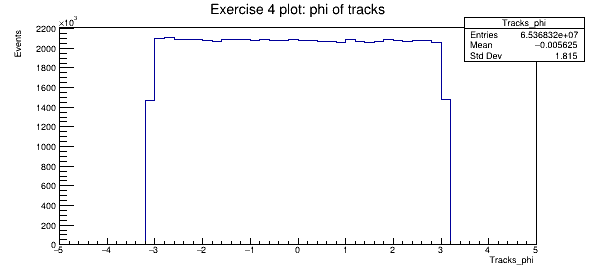

In [91]:
hist_Trks_phi->Draw();
canvasex4->Draw();

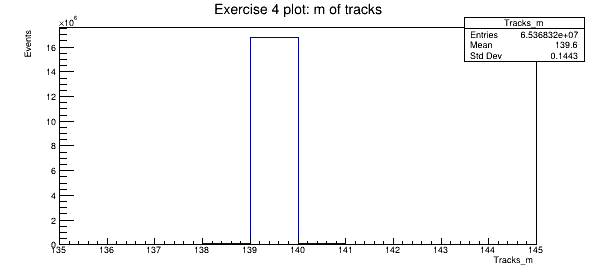

In [92]:
hist_Trks_m->Draw();
canvasex4->Draw();

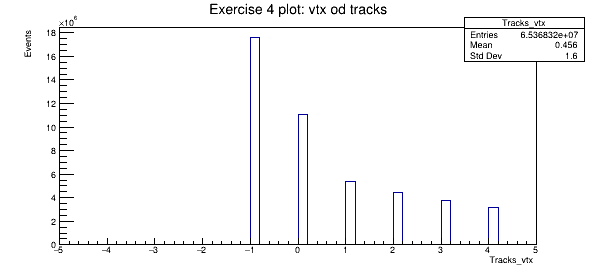

In [83]:
hist_Trks_vtx->Draw();
canvasex4->Draw();

In [60]:
vector<float> *clusters_pt;
vector<float> *clusters_eta;
vector<float> *clusters_phi;
vector<float> *clusters_m;

tree->SetBranchAddress("Clusters_pt", &clusters_pt);
tree->SetBranchAddress("Clusters_eta", &clusters_eta);
tree->SetBranchAddress("Clusters_phi", &clusters_phi);
tree->SetBranchAddress("Clusters_m", &clusters_m);

TH1F *hist_Cltrs_pt = new TH1F("Clusters_pt","Exercise 4 plot: pT of clusters; Clusters_pt ; Events ",50,0,2000);
TH1F *hist_Cltrs_eta = new TH1F("Clusters_eta","Exercise 4 plot: eta of clusters; Clusters_eta ; Events ",50,-10,10);
TH1F *hist_Cltrs_phi = new TH1F("Clusters_phi","Exercise 4 plot: phi of clusters; Clusters_phi ; Events ",50,-10,10);
TH1F *hist_Cltrs_m = new TH1F("Clusters_m","Exercise 4 plot: m of clusters; Clusters_m ; Events ",50,-100,100);

In [61]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<clusters_pt->size(); tr++)
    {
        hist_Cltrs_pt->Fill(clusters_pt->at(tr));
        hist_Cltrs_eta->Fill(clusters_eta->at(tr));
        hist_Cltrs_phi->Fill(clusters_phi->at(tr));
        hist_Cltrs_m->Fill(clusters_m->at(tr));
    } 
}
std::cout << "Done!" << std::endl;

Done!


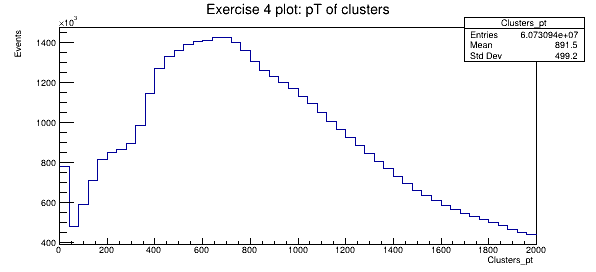

In [62]:
hist_Cltrs_pt->Draw();
canvasex4->Draw();

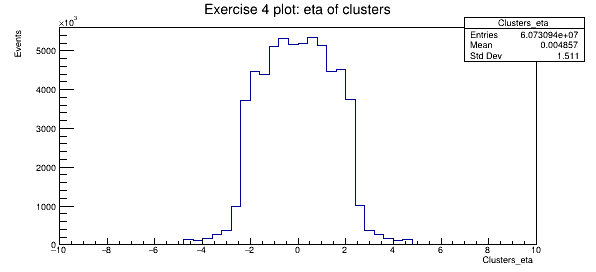

In [63]:
hist_Cltrs_eta->Draw();
canvasex4->Draw();

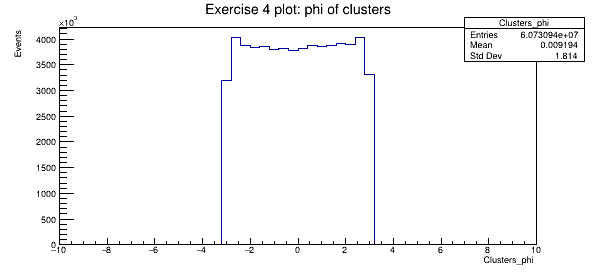

In [64]:
hist_Cltrs_phi->Draw();
canvasex4->Draw();

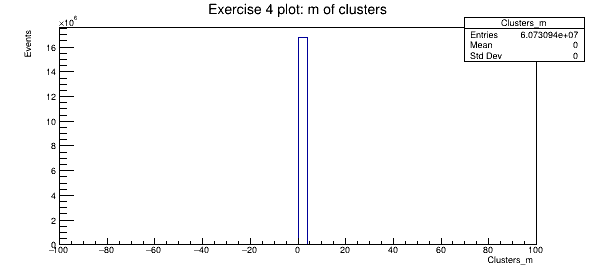

In [65]:
hist_Cltrs_m->Draw();
canvasex4->Draw();

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Exercise 5. Interpret the meaning of each variable.

- pT: Transverse momentum of each magnitude. 

- Eta: Pseudo-rapidity, the variable we use instead of the polar angle.

- Phi: Azimuthal angle that sits on a plane perpendicular to the axis of the cylinder.

- m: Reconstructed mass.

- Vtx: Vertex identification of the track.

Exercise 6. What is "Particle PDG ID"?

In [94]:
vector<int> *particle_pdgid;
tree->SetBranchAddress("Particles_pdgID", &particle_pdgid);

In [95]:
for (int l = 0; l < 10; l++){
    std::cout<< tree->GetEntry(l) << '\t' << particle_pdgid->size() << '\t' << particle_pdgid->at(l) << '\n';
}

34546	498	2112
28262	670	211
31002	621	321
37070	446	321
18334	310	-321
23498	523	2212
30206	517	-211
26962	537	-2212
47374	570	211
36758	345	211


In [96]:
tree->GetEntry(30);
for (int l = 0; l < 10; l++){
    std::cout<< particle_pdgid->at(l) << '\n';
}

2212
-2212
-211
211
-211
-211
211
211
211
211


In [97]:
TH1F *hist_Particles_pdgID = new TH1F("particlespdgid","Exercise 6 aux plot: visualization of the variable; Particle_pdgID ; Events ",50,-500,500);

In [98]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<particle_pdgid->size(); tr++)
    {
       hist_Particles_pdgID->Fill(particle_pdgid->at(tr));
    } 
}
std::cout << "Done!" << std::endl;

Done!


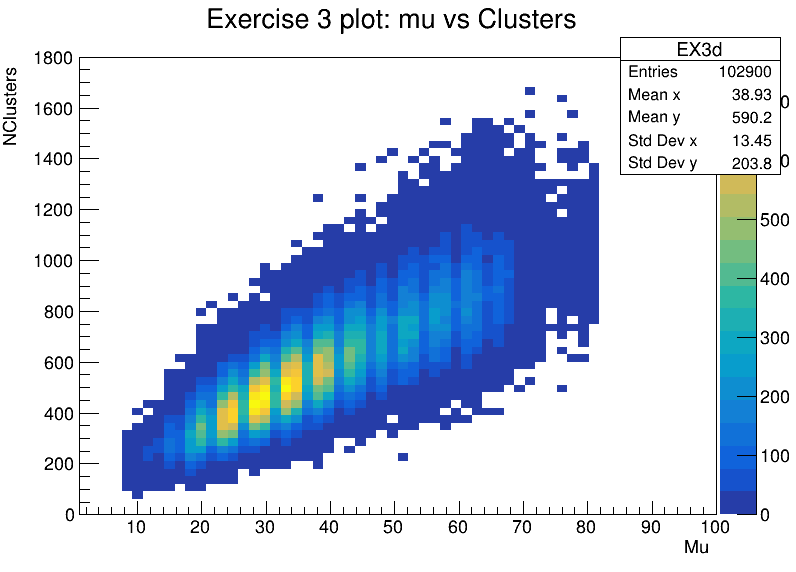

In [100]:
hist_Particles_pdgID->Draw();
canvas->Draw();

We conclude that Particle PDG ID is a numbering scheme for particles, giving each of them an ID. https://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf